In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
engine = create_engine('sqlite:///fintrack.db')

In [4]:
for file in os.listdir('datas'):
    if file.endswith('.csv'):
        df = pd.read_csv('datas/'+file)
   

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Transaction_ID                50000 non-null  object        
 1   User_ID                       50000 non-null  object        
 2   Transaction_Amount            50000 non-null  float64       
 3   Transaction_Type              50000 non-null  object        
 4   Timestamp                     50000 non-null  datetime64[ns]
 5   Account_Balance               50000 non-null  float64       
 6   Device_Type                   50000 non-null  object        
 7   Location                      50000 non-null  object        
 8   Merchant_Category             50000 non-null  object        
 9   IP_Address_Flag               50000 non-null  int64         
 10  Previous_Fraudulent_Activity  50000 non-null  int64         
 11  Daily_Transaction_Count     

In [7]:
df.head(5)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [8]:
df.describe()

,Transaction_Amount,Timestamp,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,2023-07-02 12:47:11.063999744,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
min,0.000000,2023-01-01 00:01:00,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,2023-04-02 03:35:30,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,2023-07-02 14:00:00,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,2023-10-01 07:13:00,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,2023-12-31 23:50:00,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000
std,98.687292,NaN,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996


In [9]:
categorical_columns = [
    'Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category',
    'Card_Type', 'Authentication_Method', 'IP_Address_Flag', 'Is_Weekend',
    'Fraud_Label'
]
for col in categorical_columns:
    print(f"--- Value count for '{col}'---")
    print(df[col].value_counts())
    print("\n")
    print(f"---Proportional Value Counts for '{col}'---")
    print(df[col].value_counts(normalize=True))

--- Value count for 'Transaction_Type'---
Transaction_Type
POS               12549
Online            12546
ATM Withdrawal    12453
Bank Transfer     12452
Name: count, dtype: int64


---Proportional Value Counts for 'Transaction_Type'---
Transaction_Type
POS               0.25098
Online            0.25092
ATM Withdrawal    0.24906
Bank Transfer     0.24904
Name: proportion, dtype: float64
--- Value count for 'Device_Type'---
Device_Type
Tablet    16779
Mobile    16640
Laptop    16581
Name: count, dtype: int64


---Proportional Value Counts for 'Device_Type'---
Device_Type
Tablet    0.33558
Mobile    0.33280
Laptop    0.33162
Name: proportion, dtype: float64
--- Value count for 'Location'---
Location
Tokyo       10208
Mumbai       9994
London       9945
Sydney       9938
New York     9915
Name: count, dtype: int64


---Proportional Value Counts for 'Location'---
Location
Tokyo       0.20416
Mumbai      0.19988
London      0.19890
Sydney      0.19876
New York    0.19830
Name: proportion,

* Class Imbalance
The Fraud_Label column shows a significant class imbalance. While not as extreme as some real-world datasets, it's still a major challenge.
Fraudulent Transactions: Account for approximately 32.1% of the data.
Non-Fraudulent Transactions: Account for approximately 67.9% of the data.
This means a model that simply predicts "not fraud" for every transaction would still be right about two-thirds of the time. This confirms the need to use appropriate evaluation metrics like Precision, Recall, and F1-Score, as you outlined in your roadmap, rather than just accuracy.
* Potential High-Impact Features
While most features are balanced, two binary flags stand out as potential high-value features for your model:
IP_Address_Flag: Only about 5% of transactions have this flag, but it's a very specific, pre-engineered signal. It's highly likely that this feature will have a strong correlation with fraudulent activity.
Is_Weekend: Your data shows a clear split, with roughly 70% of transactions occurring on a weekday and 30% on a weekend. This feature could be a powerful predictor if fraudulent activity tends to occur more on weekends, when manual review teams might be less active.    

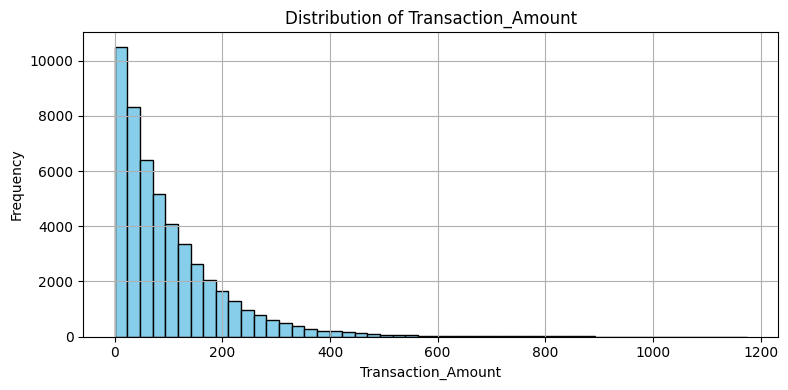

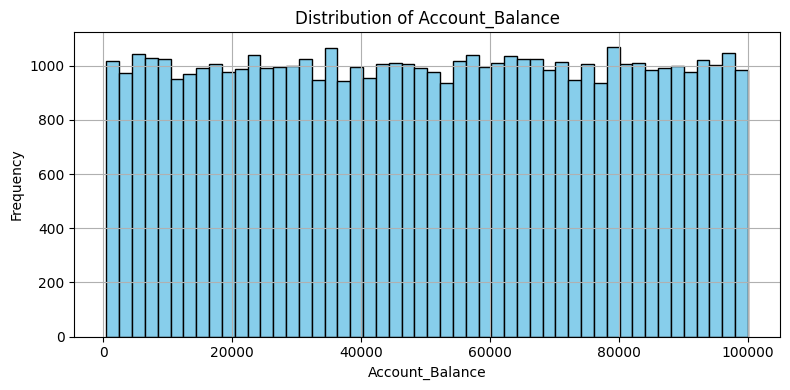

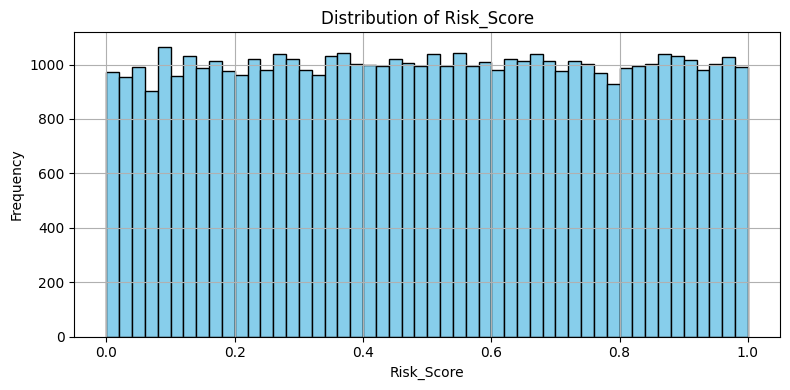

In [22]:
numerical_columns = ['Transaction_Amount', 'Account_Balance', 'Risk_Score']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Transaction_Amount histogram:
* Extreme Skewness: The data is heavily skewed to the right, with most transactions occurring at very low values. This is typical for financial data and highlights the need for careful analysis.
* Outlier Confirmation: The long tail of the distribution confirms the presence of significant outliers. These are likely the fraudulent transactions you're trying to detect, so instead of treating them as errors, you should consider them as crucial data points for your model.
### Key Insights from Risk Score Distribution
* Strong Predictive Power: The Risk_Score distributions for fraudulent and non-fraudulent transactions are distinctly different. Non-fraudulent transactions are heavily concentrated at low risk scores (close to 0), while fraudulent transactions have a much higher average risk score. This indicates that risk score is a highly effective feature for separating the two classes.
* Clear Actionable Threshold: The plot suggests a clear threshold for identifying potential fraud. Transactions with a risk score above a certain value (e.g., 0.6 or 0.7) are significantly more likely to be fraudulent. This insight can be translated into a practical business rule for flagging transactions.
* Imperfect, But Valuable, Signal: While the distributions are separated, they do overlap. This means a risk score isn't a perfect predictor on its own; some fraudulent transactions have low scores, and some legitimate ones have high scores. This highlights the need for a more sophisticated machine learning model that combines Risk_Score with other features to accurately predict fraud.
###### The combination of a high Transaction_Amount and a high Risk_Score is a powerful and reliable signal for fraud. This bivariate relationship can be used to create a strong rule for your model. It tells you that these two features, when used together, are excellent predictors.

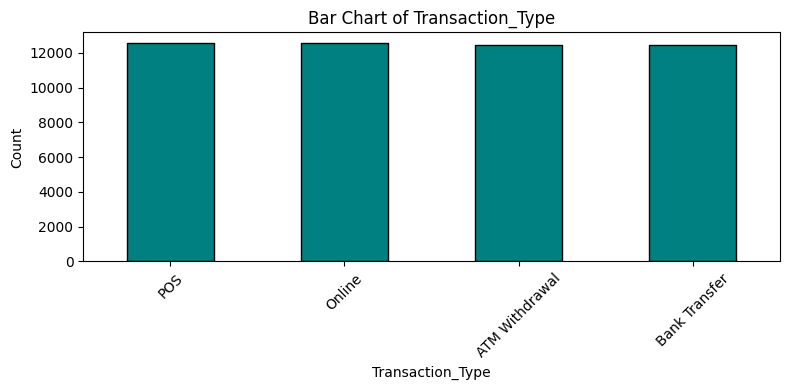

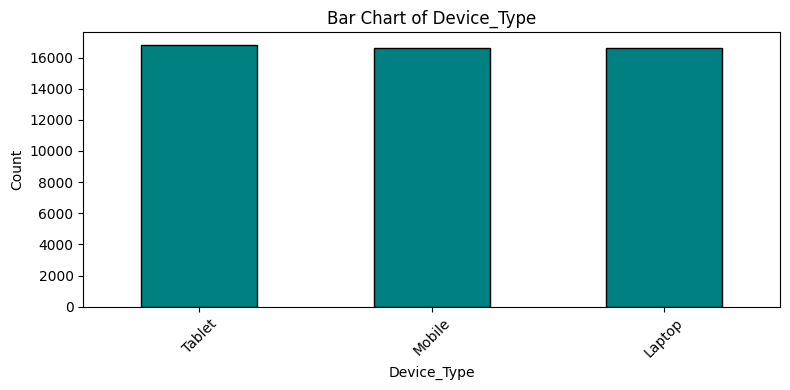

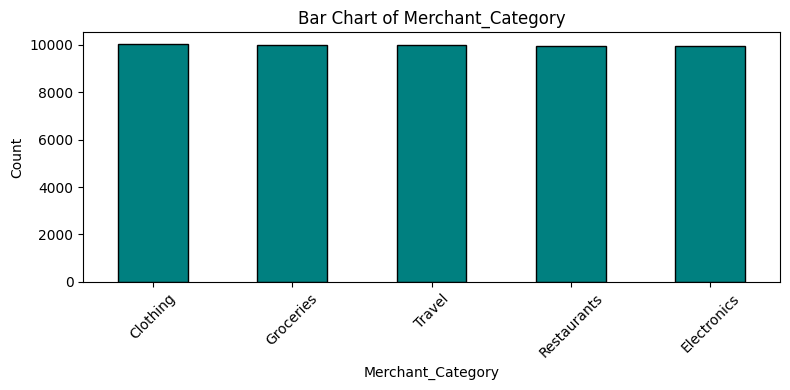

In [26]:
categoricalss_column = ['Transaction_Type', 'Device_Type', 'Merchant_Category']
for col in categoricalss_column:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='teal', edgecolor='black')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    

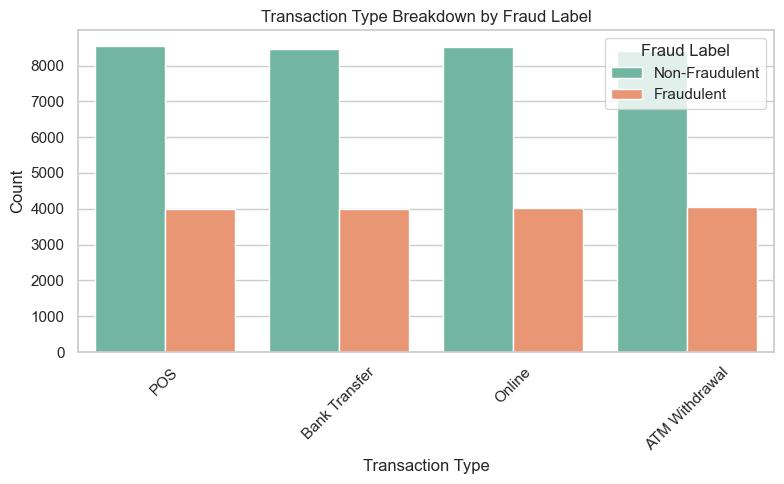

In [29]:
# Set plot style
sns.set(style="whitegrid")

# Plot Transaction_Type breakdown by Fraud_Label
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Transaction_Type', hue='Fraud_Label', palette='Set2')
plt.title('Transaction Type Breakdown by Fraud Label')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Fraud Label', labels=['Non-Fraudulent', 'Fraudulent'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Insights from Transaction Amount Distribution
Significant Difference in Medians: The median Transaction_Amount for fraudulent transactions is substantially higher than for non-fraudulent ones. This shows that the typical fraudulent transaction is for a much larger value than a typical legitimate one.

Clear Predictive Signal: The two distributions are distinctly different, with the bulk of fraudulent transactions occurring at a higher value range than non-fraudulent ones. This validates Transaction_Amount as a strong standalone feature for your model.

Outliers Are the Signal: While both distributions have outliers, the box plot for fraudulent transactions is much higher, visually confirming that the large, anomalous values you identified in previous analyses are highly correlated with fraud.

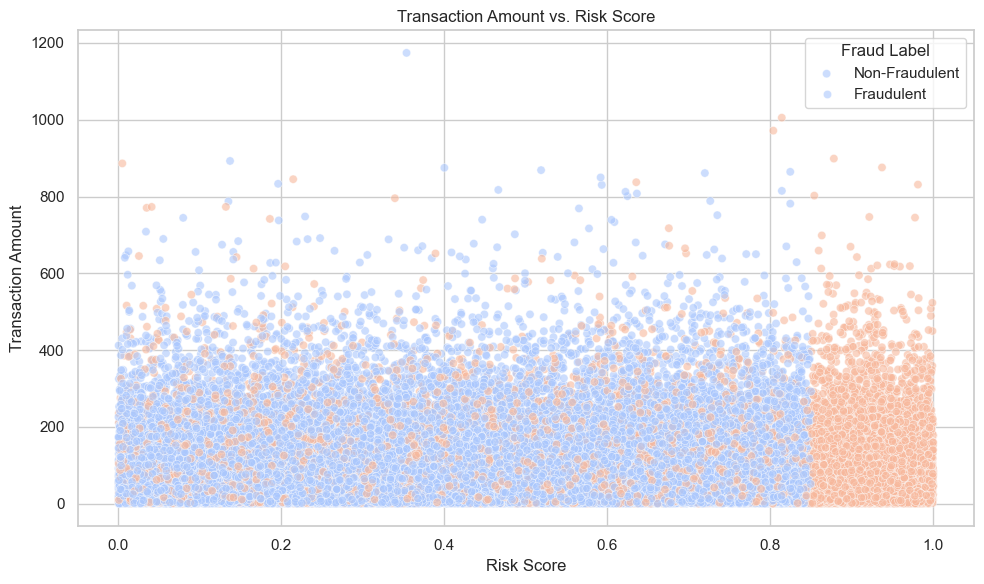

In [30]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Risk_Score', y='Transaction_Amount', hue='Fraud_Label', palette='coolwarm', alpha=0.6)

plt.title('Transaction Amount vs. Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraud Label', labels=['Non-Fraudulent', 'Fraudulent'])
plt.grid(True)
plt.tight_layout()
plt.show()


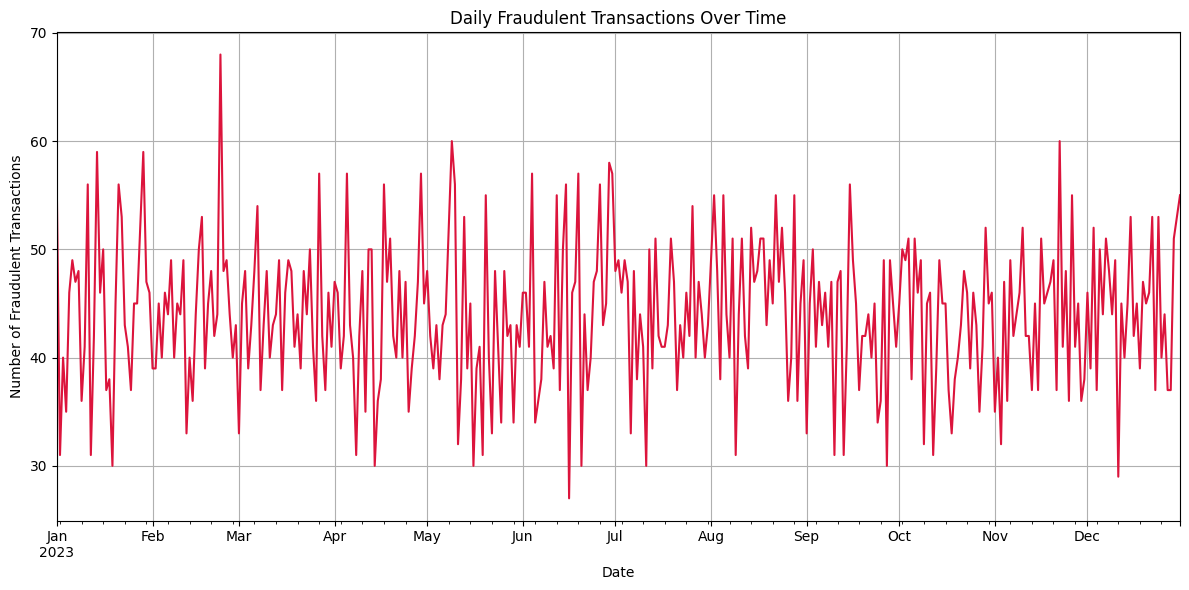

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
fraud_df = df[df['Fraud_Label'] == 1]

# Resample by day
daily_fraud = fraud_df.resample('D', on='Timestamp').size()

plt.figure(figsize=(12, 6))
daily_fraud.plot(color='crimson')
plt.title('Daily Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
fraudulent_transactions = df[df['Fraud_Label'] == 1]

# Extract the month from the 'Timestamp' and count transactions per month
monthly_fraud_counts = fraudulent_transactions.groupby(
    fraudulent_transactions['Timestamp'].dt.to_period('M')
)['Transaction_ID'].count()

# Calculate the average of the monthly counts
average_monthly_fraud = monthly_fraud_counts.mean()

print(f"The average number of fraudulent transactions per month is: {average_monthly_fraud:.2f}")

The average number of fraudulent transactions per month is: 1338.92
